# Importing Libraries

>



In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Wine Dataset
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Import common classification models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Loading Datasets

The Wine dataset contains 13 features describing different chemical properties of wines, and the goal is to classify them into 3 different wine types.

We show how many rows and columns we have then the class labels after seperating data and target labels.



In [13]:
X = data.data
y = data.target
print("✅ Loaded Wine Dataset")
print("Number of samples:", X.shape[0])
print("Number of features:", X.shape[1])
print("Classes:", data.target_names)

✅ Loaded Wine Dataset
Number of samples: 178
Number of features: 13
Classes: ['class_0' 'class_1' 'class_2']


#Split and Scale

Split the data into training and test sets (80% training, 20% testing)


In [14]:
# X and Y train are used for training and X test is the testing dataset with Y test being the actual class
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scaler ensures all features follow a similar scale reducing numerical differences
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Defining 10 classifiers


In [16]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "SVM (RBF)": SVC(kernel='rbf', probability=True),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='mlogloss', verbosity=0),
    "LightGBM": LGBMClassifier(verbose=-1),
    "CatBoost": CatBoostClassifier(verbose=0)
}

import warnings
warnings.filterwarnings("ignore")

#Runnning and Storing results
 Loop through each model, train it, and compute test accuracy

In [24]:
results = []
print("\n🏁 Training models...\n")

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((name, round(acc*100, 2)))
    print(f"✅ {name:<20} Accuracy: {round(acc*100, 2)}%")




🏁 Training models...

✅ Logistic Regression  Accuracy: 97.22%
✅ KNN                  Accuracy: 97.22%
✅ SVM (RBF)            Accuracy: 97.22%
✅ Decision Tree        Accuracy: 94.44%
✅ Random Forest        Accuracy: 100.0%
✅ AdaBoost             Accuracy: 91.67%
✅ Gradient Boosting    Accuracy: 94.44%
✅ XGBoost              Accuracy: 97.22%
✅ LightGBM             Accuracy: 100.0%
✅ CatBoost             Accuracy: 100.0%


#Results


📊 Model Performance Summary:

              Model  Accuracy (%)
           CatBoost        100.00
      Random Forest        100.00
           LightGBM        100.00
Logistic Regression         97.22
                KNN         97.22
          SVM (RBF)         97.22
            XGBoost         97.22
      Decision Tree         94.44
  Gradient Boosting         94.44
           AdaBoost         91.67


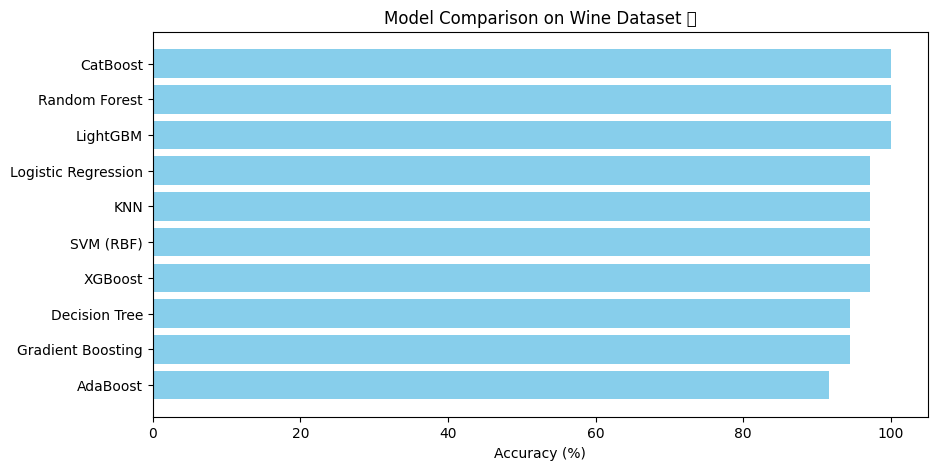

In [25]:
results_df = pd.DataFrame(results, columns=["Model", "Accuracy (%)"]).sort_values(by="Accuracy (%)", ascending=False)
print("\n📊 Model Performance Summary:\n")
print(results_df.to_string(index=False))

# Visualize results
plt.figure(figsize=(10,5))
plt.barh(results_df["Model"], results_df["Accuracy (%)"], color="skyblue")
plt.xlabel("Accuracy (%)")
plt.title("Model Comparison on Wine Dataset 🍷")
plt.gca().invert_yaxis()
plt.show()